# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition
import sklearn.feature_extraction
import sklearn.datasets

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [101]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

Let's see what dfTrain, a simulated data that we just made, looks like

In [4]:
dfTrain

,vect,category
978,"[-0.18351354615745585, -0.07691581541735161]",0
799,"[-0.6166651179052262, -0.03527195296748478]",1
808,"[0.013347748863657263, -0.08273052683605249]",0
531,"[-0.02587470718168512, -0.8071849497795158]",1
894,"[-0.02784630463415416, -0.14901390487812055]",0
...,...,...
669,"[0.7363398674745533, -0.4140998453125528]",1
867,"[-0.4358698582700946, 0.8135007407408914]",1
659,"[-0.5324686452740857, -0.5835544509509293]",1
850,"[0.026879891620561785, -0.3099907531623289]",0


So, dfTrain has two columns, vect and category. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

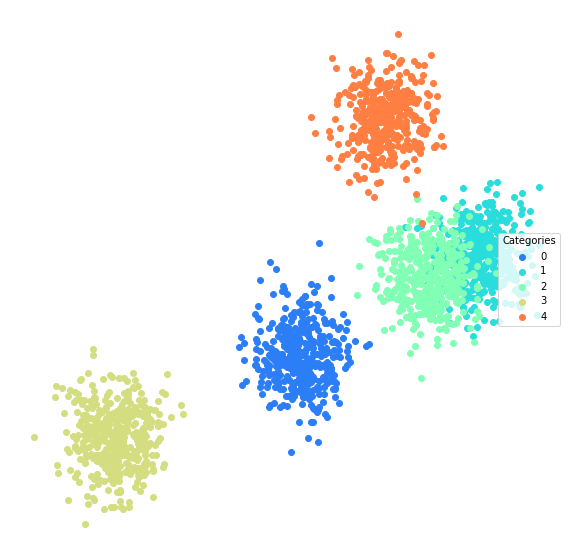

In [102]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [8]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
clf = sklearn.ensemble.GradientBoostingClassifier()

We're using sklearn here. What is sklearn? It's an open source machine learning library for Python. We use sklearn because it features various machine learning algorithms and it works well with NumPy library. You don't need to understand the sklearn package in detail for the moment, but let's see what methods and attributes sklearn has, because we're going to use some of them:

In [7]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 'base',
 'clone',
 'config_context',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'os',
 'preprocessing',
 're',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils',
 'warnings']

Now we fit the model by giving it our training data

In [9]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Here, "stack" function is used. Why did we use stack function here? This is because dfTrain['vect'] is a sequence, while clf.fit() takes an array element. Let's see what dfTrain['vect'] looks like:

In [10]:
dfTrain['vect']

978    [-0.18351354615745585, -0.07691581541735161]
799     [-0.6166651179052262, -0.03527195296748478]
808    [0.013347748863657263, -0.08273052683605249]
531     [-0.02587470718168512, -0.8071849497795158]
894    [-0.02784630463415416, -0.14901390487812055]
                           ...                     
669       [0.7363398674745533, -0.4140998453125528]
867       [-0.4358698582700946, 0.8135007407408914]
659      [-0.5324686452740857, -0.5835544509509293]
850     [0.026879891620561785, -0.3099907531623289]
579     [-0.33825908611102434, -0.3223726972106014]
Name: vect, Length: 800, dtype: object

And let's see what np.stack(dfTrain['vect']) does:

In [15]:
np.stack(dfTrain['vect'], axis=0)

array([[-0.18351355, -0.07691582],
       [-0.61666512, -0.03527195],
       [ 0.01334775, -0.08273053],
       ...,
       [-0.53246865, -0.58355445],
       [ 0.02687989, -0.30999075],
       [-0.33825909, -0.3223727 ]])

As you can see, stack function takes a sequence of arrays (which have the same shape) and joins them along a new axis.

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

# <font color='red'>Experiment 1: 10 artificial datasets
<font color='red'>Here I conduct my first experiment with 10 artificial datasets. I am not generating very interest, different datasets, because I am mainly interested in documenting how well each classifier deals with each type of split, and on top of that, how their performance changes as noise increases.
    

In [376]:
#noise = .4
noise = .8

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

In [404]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [405]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [406]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.208,0.672536,0.474747,0.329385,0.474747
1,0.210,0.745045,0.452555,0.364983,0.673913
2,0.006,0.996269,0.970297,0.970297,1.000000
3,0.002,0.998737,0.990476,0.990476,1.000000
4,0.206,0.610509,0.534483,0.306850,0.289720


This lets us look at which classes do better:

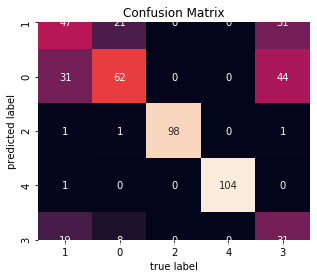

In [407]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

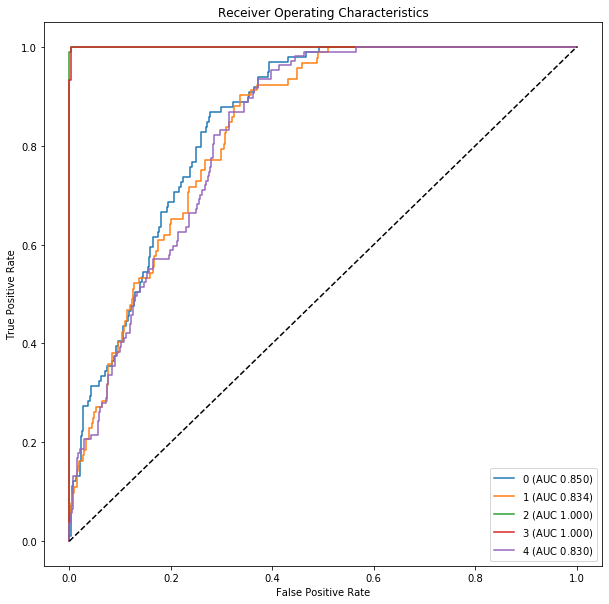

In [408]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

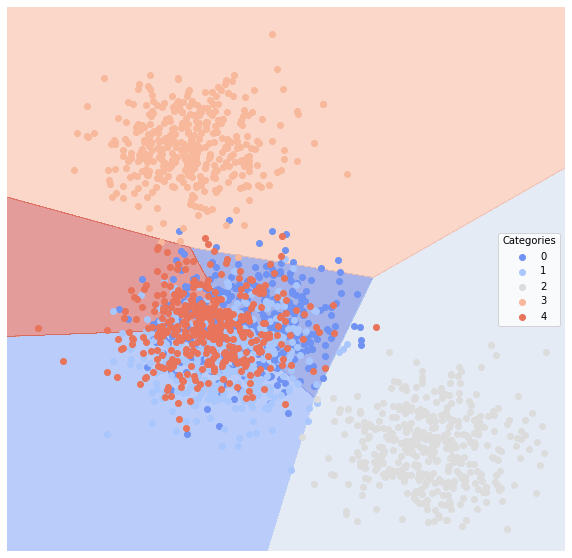

In [409]:
lucem_illud_2020.plotregions(clf, dfTrain)

# <font color='red'>Experiment 1 results
<font color='red'>The error rates for exercise 1 can be found at https://docs.google.com/spreadsheets/d/1DQ6KQGBQhpwEGa4sP-5jj2W5R2NU_BG8Hev3S-pNw9w/edit?usp=sharing

<font color='red'>A few observations for experiment 1 (10 artificial datasets, 5 with noise = 0.4, other 5 with noise = 0.8): Random noise is always an uninteresting case. The size of the noise does not mean anything since values of each class are already randomly scattered anyway. Multiblobs is another extreme case on the opposite end of the spectrum. Regardless of the classifier and the noise, error rates seem to be always low. I am not sure whether it is. Intuitively, linear models will perform poorly, but even the plot region shows the linear model is dividing the data fairly accurately.

<font color='red'>We have 3 types of splits left to discuss: andSplit, xorSplit, and targetSplit. We start with noise = 0.4. It is perhaps no surprise that linear model does as well as other classifiers for andSplit (split in half), but significantly worse for xorSplit (diagonal) and targetSplot (interior). A straight division line cannot really separate one class from anther. Other underperformers include Naive Bayes for xorSplit, and SVM for targetSplit. I do not have a strong prior for why that is the case, but it is the result of experimentation, so I will keep those results in mind. Neural network and gradient boosting consistently perform better than the others. This is perhaps not surprising, either. Esemble methods have been noted to improve predictive performance. Last, KNN, decision trees, and random forest all perform fairly well, just not to the extent of the esemble methods. Random forest consistently beats decision trees by a small margin, which is understandable considering that random forest is the collection of decision trees. When noise = 0.8, with the exception of multiblobs for whom the good performance has been mentioned above, classifiers perform almost equally poorly for all other types of splits (error rates are somewhere between 0.4 and 0.55). This leads to my conclusion for this experiment: some classifiers (KNN, decision trees, random forest, neural net, gradient boost) are great for all types of splits explored here, and for the remaining classifiers, performance is split type-specific (linear only good for andSplit, SVM not great for targetSplit, etc). And the difference in performance becomes stark as noise reduces.

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [416]:
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


In [417]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = False) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [418]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [419]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Klobuchar,0.008974,0.952703,1.000000,0.914380,0.905405
Kyl,0.016667,0.939815,1.000000,0.896296,0.879630
Kennedy,0.052564,0.952291,0.900826,0.893670,0.984940
Kohl,0.007692,0.966292,1.000000,0.940277,0.932584
Kerry,0.021795,0.963951,0.965116,0.919240,0.937853


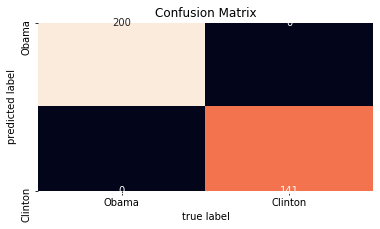

In [73]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

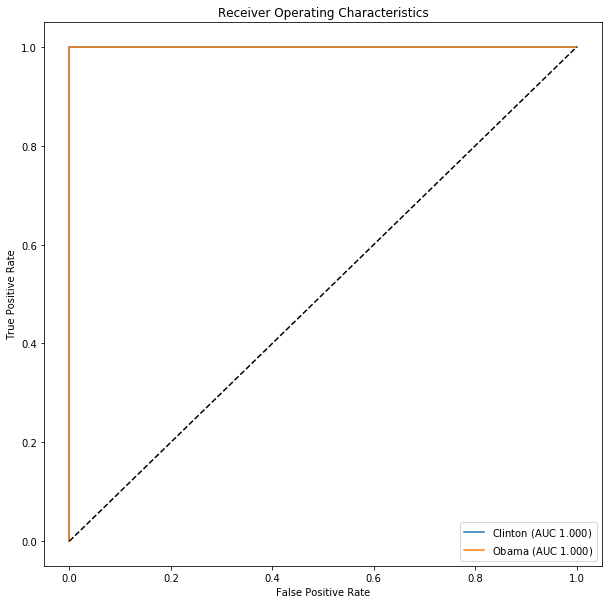

In [74]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

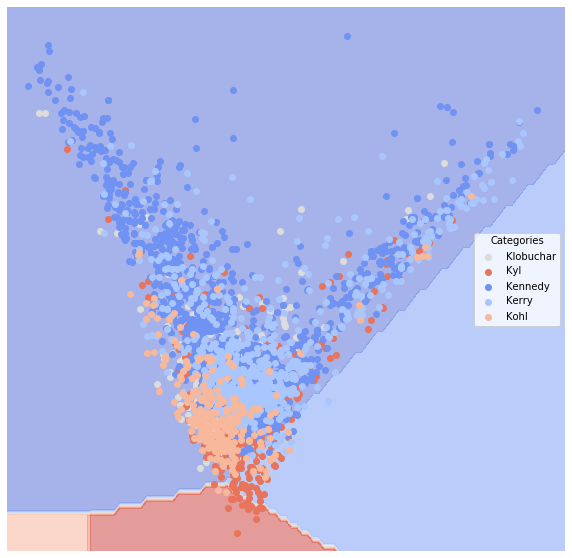

In [420]:
lucem_illud_2020.plotregions(clf, dfTrain)

# <span style="color:red">*Results with real datasets*</span>
<span style="color:red">These results can also be found in the Google sheet provided above. A few remarks: SVM, random forest, neural network, and gradient boosting are the consistent high performers here. The last three are not making a surprise appearance in the list as they are ensemble methods. SVM did not do well with targetSplit earlier. However, with all five real datasets, SVM had accurate predictions, and slightly more accurate than gradient boosting with a few datasets, most notably newGroups. Naive Bayes, as with aritificial datasets, is an underperformer. The error rates are acceptable at around 10%, which is nevertheless significantly worse than other classifiers. KNN is another decent classifier like Naive Bayes, except with the newGroups, for which KNN predicts terribly (average error rate is around 35%). The region plot may explain why that is the case, in particular, there is not a clear division line between "misc.forsale" and "comp.sys.mac.hardware."  The linear model actually did well with most datasets except senateLarge, for which the error rate is around 10%, which makes it the only classifier that cannot produce an average rate lower than 5%. Last, decisions trees is a relatively good classifier, but for the same reason mentioned above, it is simply overshadowed by random forests, who predicts slightly better with every dataset.


<span style="color:red">In the three cells below, I try out AdaBoost, which is mentioned in our fundamental reading for the week. I choose xorSplit with noise = 0.2 for the artificial dataset, and loadSpam for the real dataset, since it is the dataset the classifiers struggle with most, lowest average error rate was 8%.

In [429]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(0.2)) #artificial

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam()) #real data

In [431]:
clf = sklearn.ensemble.AdaBoostClassifier(n_estimators=100, random_state=0)

clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.49,0.510451,0.516484,0.510344,0.465347
1,0.49,0.510451,0.504587,0.500326,0.555556


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


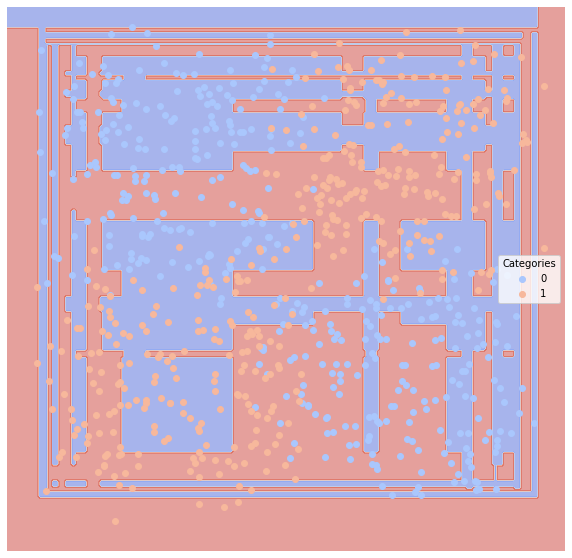

In [432]:
lucem_illud_2020.plotregions(clf, dfTrain)

# <span style="color:red">*Results with AdaBoost*</span>
<span style="color:red">It turned out not even adaBoost can get the average error rate for loadSpam under 8%, the result was 8.9% for the multiple times I tried. The terrible part is that with the artificial xorSplit dataset, adaBoost perdicted with an error rate of 50% (wow). Region plot shows what went wrong.

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [433]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

I'm pretty sure that you're all familiar with pandas, but, just to clarify: why do we use pandas here? pandas is a Python library which is widely used for analyzing and wrangling data. In particular, pandas loads data and creates data frame, a Python object that looks familiar to us (since it looks like a excel table) and easy to work with. So, using pandas.read_csv function, we take in the csv file and convert it into a data frame. 

In [434]:
type(ObamaClintonReleases)

pandas.core.frame.DataFrame

It's a DataFrame! and it looks like this:

In [435]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama
...,...,...,...,...,...,...
1704,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton285.txt,raw/Clinton/1Sep2005Clinton285.txt,September 1 2005 Senator Clinton Visit Infoto...,Clinton
1705,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton286.txt,raw/Clinton/1Sep2005Clinton286.txt,September 1 2005 Senator Clinton Announces Ex...,Clinton
1706,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton287.txt,raw/Clinton/1Sep2005Clinton287.txt,September 1 2005 Senator Clinton Joins Local ...,Clinton
1707,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2006Clinton207.txt,raw/Clinton/1Sep2006Clinton207.txt,September 1 2006 Clintons Meet with Cazenovia...,Clinton


Neat! Let's turn the 'targetSenator' column into a binary category variable.

In [436]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [437]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [438]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator,category,tokenized_text,normalized_text
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama,True,"[Obama, Calls, on, IRS, to, Protect, Taxpayers...","[obama, call, irs, protect, taxpayer, privacy,..."
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama,True,"[Statement, from, Senator, Barack, Obama, on, ...","[statement, senator, barack, obama, dodd, shel..."
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama,True,"[Obama, Says, Bill, Will, Help, Cut, Off, Supp...","[obama, say, bill, help, cut, supply, dangerou..."
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama,True,"[Obama, Durbin, Say, Illinois, Will, Receive, ...","[obama, durbin, illinois, receive, percent, fu..."
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama,True,"[Obama, Introduces, Bill, to, Help, Tap, Power...","[obama, introduce, bill, help, tap, power, gen..."
...,...,...,...,...,...,...,...,...,...
1704,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton285.txt,raw/Clinton/1Sep2005Clinton285.txt,September 1 2005 Senator Clinton Visit Infoto...,Clinton,False,"[September, 1, 2005, Senator, Clinton, Visit, ...","[september, senator, clinton, visit, infotonic..."
1705,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton286.txt,raw/Clinton/1Sep2005Clinton286.txt,September 1 2005 Senator Clinton Announces Ex...,Clinton,False,"[September, 1, 2005, Senator, Clinton, Announc...","[september, senator, clinton, announce, expans..."
1706,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton287.txt,raw/Clinton/1Sep2005Clinton287.txt,September 1 2005 Senator Clinton Joins Local ...,Clinton,False,"[September, 1, 2005, Senator, Clinton, Joins, ...","[september, senator, clinton, join, local, com..."
1707,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2006Clinton207.txt,raw/Clinton/1Sep2006Clinton207.txt,September 1 2006 Clintons Meet with Cazenovia...,Clinton,False,"[September, 1, 2006, Clintons, Meet, with, Caz...","[september, clintons, meet, cazenovia, college..."


Let's split the data into training data and testing data.

In [439]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [440]:
print(len(train_data_df))
print(len(test_data_df))

1368
341


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [441]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'])

The core function here is TfidfVectorizer, which takes a collection of raw documents and turn them to a tf-idf matrix. Just to recap: tf-idf means term frequency-inverse document frequency, a statistic (or, more precisely, a product of two statistics, term frequency and inverse document frequency) that shows the importance of a term vis-a-vis documents. TF, or, term frequency, counts how many times a term is used in a document; IDF, or, inverse-document-frequency, measures common or rare a term appears across documents. 

Let's look at three parameters of TfidfVectorizer: max_df = 100, min_df = 2, and norm='l2'. What do those parameters mean? 

(1) max_df = 100

Here, we specified a thredhold of 100, and the terms that have a document frequency higher than 100 would be ignored.

(2) min_df = 2

We specified a lower bound, 2, and the terms that have a document frequency lower than 2 will be ignored.

(3) norm = 'l2'

This parameter is about vector normalization. In machine learning, we commonly normalize vectors, i.e., change the length of vectors and turn them into a unit vector, before passing them into algorithms. There are various ways of normalizations, and this parameter specifies how we normalize vectors. Here, we set the norm to l2, in which case, we normalize the vectors such that squares of vector elements sums to 1. Alternatively, we can set it to l1, in which case the sum of absolute values of vector elements, not the square of vector elements, is 1. 

fit_transform() literally fits to data and then transform it. So, fit_transform() is just a combination of two steps--(1) fitting parameters to data; (2) then, using the vocabulary and document frequencies learned by fit(), transforming documents into document-term matrix. So, it's the same as fit followed by transform. 

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [444]:
TFVects.shape

(1368, 11252)

In [447]:
print(TFVects)

  (0, 3114)	0.023780942834000847
  (0, 8799)	0.02790869300576726
  (0, 5627)	0.021256026297534675
  (0, 2248)	0.019620563445539925
  (0, 7792)	0.027049064551588953
  (0, 4026)	0.017601673293882108
  (0, 2010)	0.019156428051406094
  (0, 5349)	0.021869214181419388
  (0, 3794)	0.019620563445539925
  (0, 5221)	0.032228914921758514
  (0, 3627)	0.0284054576165956
  (0, 2501)	0.024410530397010844
  (0, 8421)	0.028960793204170412
  (0, 9590)	0.03031718626917706
  (0, 5216)	0.026671670949452216
  (0, 4406)	0.05581738601153452
  (0, 4572)	0.019957485528837932
  (0, 7502)	0.03031718626917706
  (0, 4225)	0.047561885668001694
  (0, 9093)	0.02790869300576726
  (0, 4822)	0.023588471089775995
  (0, 2585)	0.026322259049592303
  (0, 990)	0.019957485528837932
  (0, 5709)	0.01804575687625647
  (0, 9071)	0.04251205259506935
  :	:
  (1367, 7416)	0.047972420740014635
  (1367, 1597)	0.06029461591948183
  (1367, 5950)	0.06172601215996801
  (1367, 10795)	0.05504486382196203
  (1367, 10261)	0.059003102116244835


In [448]:
train_data_df

,download_url,html_url,name,path,text,targetSenator,category,tokenized_text,normalized_text,vect
1478,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,18May2005Clinton509.txt,raw/Clinton/18May2005Clinton509.txt,May 18 2005 Clinton Efforts To Derail The Hu...,Clinton,False,"[May, 18, 2005, Clinton, Efforts, To, Derail, ...","[clinton, effort, derail, hudson, river, clean...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1126,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,14Mar2006Clinton603.txt,raw/Clinton/14Mar2006Clinton603.txt,March 14 2006 Senator Clinton Receives Congre...,Clinton,False,"[March, 14, 2006, Senator, Clinton, Receives, ...","[march, senator, clinton, receive, congression...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
631,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,6Nov2007Obama219.txt,raw/Obama/6Nov2007Obama219.txt,Obama Kerry Domenici Hagel Call on Penta...,Obama,True,"[Obama, Kerry, Domenici, Hagel, Call, on, Pent...","[obama, kerry, domenici, hagel, pentagon, ensu...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1538,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,19Dec2005Clinton19.txt,raw/Clinton/19Dec2005Clinton19.txt,December 19 2005 Schumer Clinton Congressio...,Clinton,False,"[December, 19, 2005, Schumer, Clinton, Congres...","[december, schumer, clinton, congressional, pa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1035,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,13May2005Clinton537.txt,raw/Clinton/13May2005Clinton537.txt,May 13 2005 Senator Clinton Announces Ft Dru...,Clinton,False,"[May, 13, 2005, Senator, Clinton, Announces, F...","[senator, clinton, announce, ft, drum, preserv...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
877,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,12Jul2006Clinton373.txt,raw/Clinton/12Jul2006Clinton373.txt,July 12 2006 Senator Clinton Secures Key Sena...,Clinton,False,"[July, 12, 2006, Senator, Clinton, Secures, Ke...","[july, senator, clinton, secure, key, senate, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1290,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,16Jul2007Clinton581.txt,raw/Clinton/16Jul2007Clinton581.txt,July 16 2007 Statement of Senator Hillary Rod...,Clinton,False,"[July, 16, 2007, Statement, of, Senator, Hilla...","[july, statement, senator, hillary, rodham, cl...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
632,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,6Oct2005Obama640.txt,raw/Obama/6Oct2005Obama640.txt,Obama Durbin Amendment Ensures VA Review o...,Obama,True,"[Obama, Durbin, Amendment, Ensures, VA, Review...","[obama, durbin, amendment, ensure, va, review,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
406,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,25Jul2007Obama327.txt,raw/Obama/25Jul2007Obama327.txt,Obama and McCaskill Applaud Passage of Woun...,Obama,True,"[Obama, and, McCaskill, Applaud, Passage, of, ...","[obama, mccaskill, applaud, passage, wound, wa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


We can save this in the dataframe to make things easier

In [449]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [450]:
train_data_df

,download_url,html_url,name,path,text,targetSenator,category,tokenized_text,normalized_text,vect
1478,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,18May2005Clinton509.txt,raw/Clinton/18May2005Clinton509.txt,May 18 2005 Clinton Efforts To Derail The Hu...,Clinton,False,"[May, 18, 2005, Clinton, Efforts, To, Derail, ...","[clinton, effort, derail, hudson, river, clean...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1126,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,14Mar2006Clinton603.txt,raw/Clinton/14Mar2006Clinton603.txt,March 14 2006 Senator Clinton Receives Congre...,Clinton,False,"[March, 14, 2006, Senator, Clinton, Receives, ...","[march, senator, clinton, receive, congression...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
631,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,6Nov2007Obama219.txt,raw/Obama/6Nov2007Obama219.txt,Obama Kerry Domenici Hagel Call on Penta...,Obama,True,"[Obama, Kerry, Domenici, Hagel, Call, on, Pent...","[obama, kerry, domenici, hagel, pentagon, ensu...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1538,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,19Dec2005Clinton19.txt,raw/Clinton/19Dec2005Clinton19.txt,December 19 2005 Schumer Clinton Congressio...,Clinton,False,"[December, 19, 2005, Schumer, Clinton, Congres...","[december, schumer, clinton, congressional, pa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1035,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,13May2005Clinton537.txt,raw/Clinton/13May2005Clinton537.txt,May 13 2005 Senator Clinton Announces Ft Dru...,Clinton,False,"[May, 13, 2005, Senator, Clinton, Announces, F...","[senator, clinton, announce, ft, drum, preserv...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
877,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,12Jul2006Clinton373.txt,raw/Clinton/12Jul2006Clinton373.txt,July 12 2006 Senator Clinton Secures Key Sena...,Clinton,False,"[July, 12, 2006, Senator, Clinton, Secures, Ke...","[july, senator, clinton, secure, key, senate, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1290,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,16Jul2007Clinton581.txt,raw/Clinton/16Jul2007Clinton581.txt,July 16 2007 Statement of Senator Hillary Rod...,Clinton,False,"[July, 16, 2007, Statement, of, Senator, Hilla...","[july, statement, senator, hillary, rodham, cl...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
632,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,6Oct2005Obama640.txt,raw/Obama/6Oct2005Obama640.txt,Obama Durbin Amendment Ensures VA Review o...,Obama,True,"[Obama, Durbin, Amendment, Ensures, VA, Review...","[obama, durbin, amendment, ensure, va, review,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
406,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,25Jul2007Obama327.txt,raw/Obama/25Jul2007Obama327.txt,Obama and McCaskill Applaud Passage of Woun...,Obama,True,"[Obama, and, McCaskill, Applaud, Passage, of, ...","[obama, mccaskill, applaud, passage, wound, wa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


Looks simple, but we need to know what todense() does here. todense() returns a dense matrix representation of the matrix. Why do we need this? As you can see above, the TFVects, a document-term matrix, has 11349 columns, and this matrix is sparse, in the sense that it is comprised mostly of zeros. Dense matrices, in contrast, are the matrices that are comprised of mostly non-zeros. Then why do we make sparse matrices into dense ones? Because zero values don't contain important information but take up so much memory.

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [451]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [453]:
train_data_df['pca'] = [r for r in reduced_data]

In [454]:
train_data_df

,download_url,html_url,name,path,text,targetSenator,category,tokenized_text,normalized_text,vect,pca
1478,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,18May2005Clinton509.txt,raw/Clinton/18May2005Clinton509.txt,May 18 2005 Clinton Efforts To Derail The Hu...,Clinton,False,"[May, 18, 2005, Clinton, Efforts, To, Derail, ...","[clinton, effort, derail, hudson, river, clean...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02436741265157824, -0.024038373005153803, ..."
1126,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,14Mar2006Clinton603.txt,raw/Clinton/14Mar2006Clinton603.txt,March 14 2006 Senator Clinton Receives Congre...,Clinton,False,"[March, 14, 2006, Senator, Clinton, Receives, ...","[march, senator, clinton, receive, congression...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.02658057113675185, 0.004612683808671778, -..."
631,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,6Nov2007Obama219.txt,raw/Obama/6Nov2007Obama219.txt,Obama Kerry Domenici Hagel Call on Penta...,Obama,True,"[Obama, Kerry, Domenici, Hagel, Call, on, Pent...","[obama, kerry, domenici, hagel, pentagon, ensu...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.12694631318944646, 0.05093407411266488, 0.0..."
1538,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,19Dec2005Clinton19.txt,raw/Clinton/19Dec2005Clinton19.txt,December 19 2005 Schumer Clinton Congressio...,Clinton,False,"[December, 19, 2005, Schumer, Clinton, Congres...","[december, schumer, clinton, congressional, pa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.018524926992561766, -0.05436187537915681, ..."
1035,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,13May2005Clinton537.txt,raw/Clinton/13May2005Clinton537.txt,May 13 2005 Senator Clinton Announces Ft Dru...,Clinton,False,"[May, 13, 2005, Senator, Clinton, Announces, F...","[senator, clinton, announce, ft, drum, preserv...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.019912242454192628, -0.017526001332651704, ..."
...,...,...,...,...,...,...,...,...,...,...,...
877,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,12Jul2006Clinton373.txt,raw/Clinton/12Jul2006Clinton373.txt,July 12 2006 Senator Clinton Secures Key Sena...,Clinton,False,"[July, 12, 2006, Senator, Clinton, Secures, Ke...","[july, senator, clinton, secure, key, senate, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03149358915504649, -0.006327063973669152, ..."
1290,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,16Jul2007Clinton581.txt,raw/Clinton/16Jul2007Clinton581.txt,July 16 2007 Statement of Senator Hillary Rod...,Clinton,False,"[July, 16, 2007, Statement, of, Senator, Hilla...","[july, statement, senator, hillary, rodham, cl...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.008290556748170945, -0.027308793107098966, ..."
632,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,6Oct2005Obama640.txt,raw/Obama/6Oct2005Obama640.txt,Obama Durbin Amendment Ensures VA Review o...,Obama,True,"[Obama, Durbin, Amendment, Ensures, VA, Review...","[obama, durbin, amendment, ensure, va, review,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4635067055492369, 0.2530950738264517, 0.193..."
406,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,25Jul2007Obama327.txt,raw/Obama/25Jul2007Obama327.txt,Obama and McCaskill Applaud Passage of Woun...,Obama,True,"[Obama, and, McCaskill, Applaud, Passage, of, ...","[obama, mccaskill, applaud, passage, wound, wa...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2269279398899793, 0.113636

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


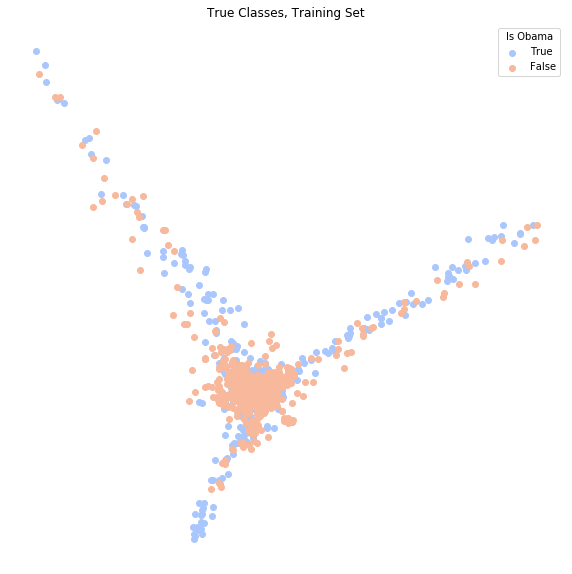

In [455]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

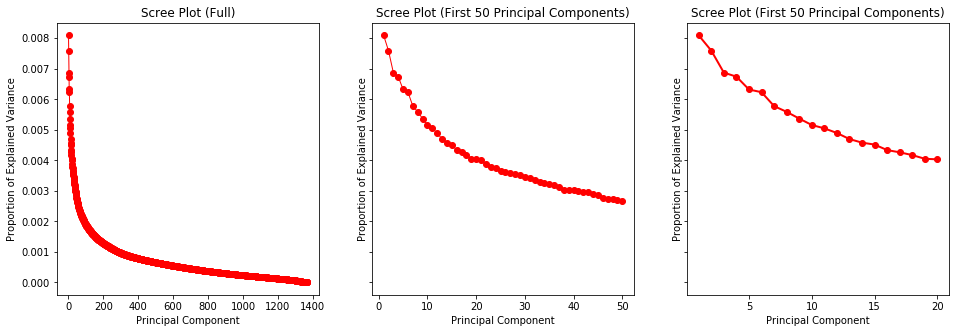

In [456]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [457]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [458]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [459]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6652046783625731

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [460]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.656891495601173

Slightly poorer. How about using more dimensions (40)?

In [462]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7383040935672515
Testing:
0.7038123167155426


Or still more (100)?

In [463]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8238304093567251
Testing:
0.7683284457478006


Or even more (200)!

In [464]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8654970760233918
Testing:
0.8064516129032258


This is becoming ridiculous (400)!

In [465]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9042397660818714
Testing:
0.8299120234604106


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [466]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9605263157894737


Train the model using training data, and then test it on the testing data.

In [467]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8328445747800587


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [468]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [469]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.966374269005848
Testing:
0.8651026392961877


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [470]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [471]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8601398601398601

Recall:

In [472]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.825503355704698

F1-measure:

In [473]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8424657534246576

Let's take a look at how well our posterior distribution looks relative to the truth.

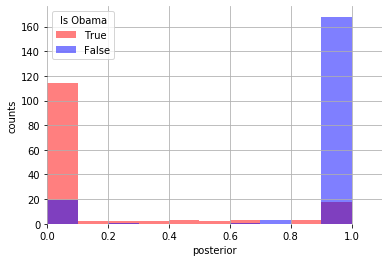

In [474]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [475]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,signature,-2.186175,dick,-1.820642
1,fy,-2.278194,amy,-1.842865
2,urban,-2.353229,brundage,-1.900685
3,welcomed,-2.366301,chicago,-2.027437
4,awarded,-2.379546,temporary,-2.157115
5,ground,-2.379546,reform,-2.204367
6,honor,-2.379546,respond,-2.271059
7,urging,-2.379546,location,-2.288451
8,read,-2.392969,accountability,-2.306150
9,construction,-2.462928,don,-2.324169


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's use again the dataset we used in week 3, the 20 newsgroup dataset.

In [476]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [477]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [478]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [479]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [480]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [481]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [482]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [483]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.8943702843876958


In [484]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
375,talk.religion.misc,soc.religion.christian
1866,comp.graphics,comp.graphics
1834,comp.graphics,comp.graphics
380,soc.religion.christian,soc.religion.christian
1525,sci.space,sci.space
1760,comp.graphics,comp.graphics
1639,comp.graphics,comp.graphics
1349,sci.space,sci.space
1551,sci.space,sci.space
1923,comp.graphics,comp.graphics


Looks pretty good, lets examine the testing dataset:

In [485]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.8069767441860465


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

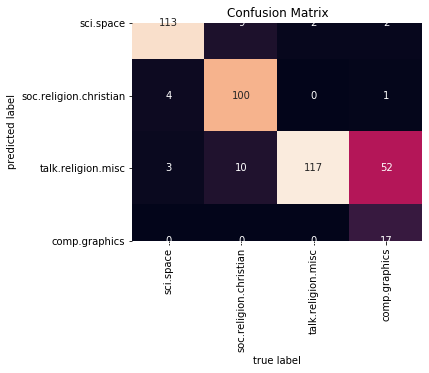

In [486]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [488]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall
print(sklearn.metrics.f1_scoretest_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted') #F-1 measure

0.8591915836101883
0.8069767441860465


AttributeError: module 'sklearn.metrics' has no attribute 'f1_scoretest_ng_df'

We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [490]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
sci.space,0.055814,0.912129,0.952381,0.844506,0.840336
soc.religion.christian,0.155814,0.887095,0.642857,0.636704,0.983193
talk.religion.misc,0.127907,0.618056,1.000000,0.364018,0.236111
comp.graphics,0.046512,0.949866,0.896825,0.860790,0.941667


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

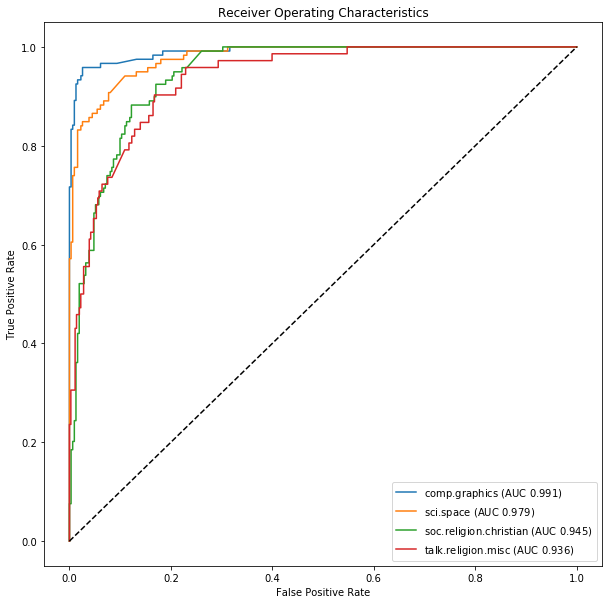

In [491]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

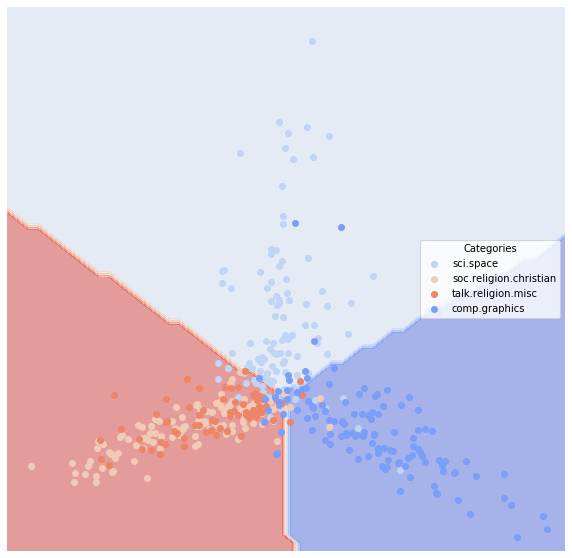

In [492]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


## <span style="color:red">*Exercise 2: setup*</span>


<span style="color:red">For the remaining exercises, I import a dataset from Kaggle that contains lines from the TV show, "Rick and Morty." Besides the lines, we have the key variable "name," which records who is responsible for a line. To keep the exericse simple, I turn name into a binary variable by dropping all lines that do not belong to Rick or Morty, ie name = 1 if Rick, name = 0 if Morty. The goal is to build an algorithm that correctly predicts whether a line belongs to Rick or Morty. The sample size is 767; 614 and 153 for training set and test set, respectively

In [2]:
rickOrMorty = pandas.read_csv('../data/RickAndMortyScripts.csv', index_col=0)

In [52]:
rickOrMorty.drop(rickOrMorty[(rickOrMorty['name']!='Rick') & (rickOrMorty['name']!='Morty')].index , inplace=True)

In [57]:
rickOrMorty

,season no.,episode no.,episode name,name,line,tokenized_line,normalized_line
index,,,,,,,
0,1,1,Pilot,True,Morty! You gotta come on. Jus'... you gotta co...,"[Morty, You, got, ta, come, on, Jus, you, got,...","[morty, get, ta, come, ju, get, ta, come]"
1,1,1,Pilot,False,"What, Rick? What’s going on?","[What, Rick, What, ’s, going, on]","[rick, go]"
2,1,1,Pilot,True,"I got a surprise for you, Morty.","[I, got, a, surprise, for, you, Morty]","[get, surprise, morty]"
3,1,1,Pilot,False,It's the middle of the night. What are you tal...,"[It, 's, the, middle, of, the, night, What, ar...","[middle, night, talk]"
4,1,1,Pilot,True,"Come on, I got a surprise for you. Come on, h...","[Come, on, I, got, a, surprise, for, you, Come...","[come, get, surprise, come, hurry]"
...,...,...,...,...,...,...,...
2483,3,7,Tales From the Citadel,False,That was amazing!,"[That, was, amazing]",[amaze]
2484,3,7,Tales From the Citadel,True,Got some of that mermaid puss!,"[Got, some, of, that, mermaid, puss]","[get, mermaid, puss]"
2485,3,7,Tales From the Citadel,False,I'm really hoping it wasn't a one-off thing an...,"[I, 'm, really, hoping, it, was, n't, a, one, ...","[be, hope, thing, way, hey, um, curious, have,..."


In [54]:
rickOrMorty['name'] = [s == 'Rick' for s in rickOrMorty['name']]

In [56]:
rickOrMorty['tokenized_line'] = rickOrMorty['line'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
rickOrMorty['normalized_line'] = rickOrMorty['tokenized_line'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [91]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(rickOrMorty, holdBackFraction=holdBackFraction)

In [107]:
print(len(train_data_df))
print(len(test_data_df))

614
153


## <span style="color:red">*Exercise 2: logistic regression and naive Bayes*</span>
<span style="color:red">I start by replicating the navigative procedure with the new dataset.


In [92]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['line'])

In [69]:
train_data_df

,season no.,episode no.,episode name,name,line,tokenized_line,normalized_line,vect,pca
index,,,,,,,,,
411,1,2,Lawnmower Dog,False,"Oh, geez, Rick. W-w-whoa, this isn't good.","[Oh, geez, Rick, W, w, whoa, this, is, n't, good]","[oh, geez, rick, w, w, whoa, good]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.2532877847704536, 0.252187458064356, 0.0118..."
851,2,1,A Rickle in Time,True,"Alright, hear me out on this. You're immortal,...","[Alright, hear, me, out, on, this, You, 're, i...","[alright, hear, immortal, right, mean, life, i...","[0.0, 0.3501752726146579, 0.0, 0.0, 0.0, 0.0, ...","[-0.07401369900686176, -0.06711333880775584, 0..."
135,1,1,Pilot,True,"You ask a lot of questions, Morty. Not very ch...","[You, ask, a, lot, of, questions, Morty, Not, ...","[ask, lot, question, morty, charismatic, make,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.051272141894713366, -0.04117500954541073, ..."
1706,3,3,Pickle Rick,False,"Rick, did you do this on purpose to get out of...","[Rick, did, you, do, this, on, purpose, to, ge...","[rick, purpose, family, counsel]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.04056775937551367, 0.3674106338081396, -0...."
170,1,1,Pilot,False,"Oh, geez, Rick. I really don't want to have to...","[Oh, geez, Rick, I, really, do, n't, want, to,...","[oh, geez, rick, want]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.30178287255444003, 0.30876904747247746, -0...."
...,...,...,...,...,...,...,...,...,...
2000,3,4,Vindicators 3 The Return of Worldender,False,"Just focus on the mission, all right?","[Just, focus, on, the, mission, all, right]","[focus, mission, right]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.07947840229844012, -0.07480075001260089, 0..."
1586,3,1,The Rickshank Rickdemption,True,Not until I finish what I started. And that is...,"[Not, until, I, finish, what, I, started, And,...","[finish, start, level, access, password]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03896013274277329, -0.04521397629951598, -..."
590,1,6,Rick Potion 9,False,"Oh man. I love you too, Jessica!","[Oh, man, I, love, you, too, Jessica]","[oh, man, love, jessica]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.4396555793286729, -0.08764284102471691, -0...."


In [93]:
TFVects.shape

(614, 503)

In [94]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

In [95]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [96]:
train_data_df['pca'] = [r for r in reduced_data]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


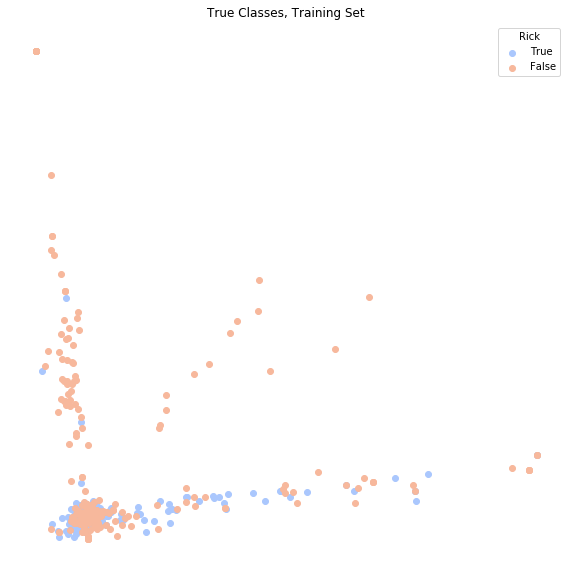

In [97]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Rick
a = np.stack(train_data_df[train_data_df['name']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot Morty
a = np.stack(train_data_df[train_data_df['name'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Rick')
plt.title('True Classes, Training Set')
plt.show()

<span style="color:red">I haven't figured out why the cell below does not compile.

ValueError: x and y must have same first dimension, but have shapes (614,) and (503,)

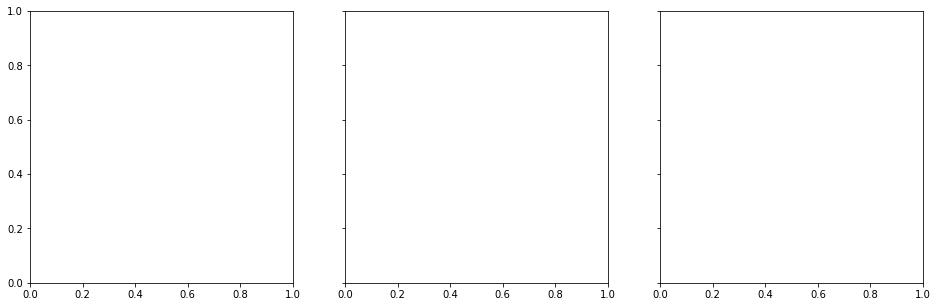

In [98]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [99]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

In [100]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['name'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [101]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['name'])

0.6970684039087948

<span style="color:red">Accuracy is 70% for the training set.

In [102]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['line'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['name'])

0.6666666666666666

<span style="color:red">With 10 components, accuracy is 66.7% for the test set.

In [103]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['name'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['name']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['name']))

Training:
0.7361563517915309
Testing:
0.673202614379085


<span style="color:red">With 40 components, the accuracies are 74% and 67% for training and test sets, respectively.

In [104]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['name'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['name']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['name']))

Training:
0.760586319218241
Testing:
0.6666666666666666


<span style="color:red">With 100 components, the accuracy continues to increase for the training set, but stagnates for the test set due to the sample size being 153. The trend continues as one increases # dimension to 200 and 400.

In [105]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['name'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['name']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['name']))

Training:
0.8029315960912052
Testing:
0.6797385620915033


In [106]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['name'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['name']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['name']))

Training:
0.8257328990228013
Testing:
0.6666666666666666


In [109]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['name'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['name']))

0.8273615635179153


<span style="color:red">The cell above yields the highest accuracy of 82.6% so far for the training set.

In [111]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['name']))

0.6666666666666666


<span style="color:red">It seems that accuracy for the test set is bound by 66.7%.

In [113]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['name'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [114]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['name']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['name']))

Training:
0.8094462540716613
Testing:
0.6666666666666666


In [115]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0]

In [120]:
sklearn.metrics.precision_score(test_data_df['name'], test_data_df['nb_predict'])

0.7580645161290323

In [121]:
sklearn.metrics.recall_score(test_data_df['name'], test_data_df['nb_predict'])

0.5662650602409639

In [122]:
sklearn.metrics.f1_score(test_data_df['name'], test_data_df['nb_predict'])

0.6482758620689655

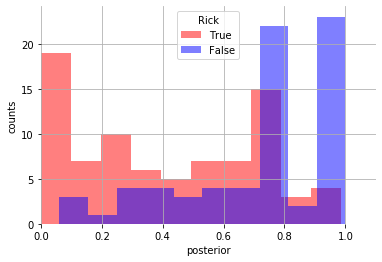

In [124]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['name'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['name'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Rick")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

In [131]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Rick' : [],
    'Rick_log_prob' : [],
    'Morty' : [],
    'Morty_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Rick'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Rick_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Morty'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Morty_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Rick,Rick_log_prob,Morty,Morty_log_prob
0,rick,-1.354546,just,-2.088330
1,oh,-1.967650,don,-2.270652
2,know,-2.412336,know,-2.299640
3,just,-2.686773,gonna,-2.329493
4,man,-2.686773,oh,-2.493796
5,like,-2.740840,like,-2.567904
6,right,-2.740840,got,-2.647946
7,jessica,-2.923162,right,-2.647946
8,don,-2.992154,time,-2.690506
9,geez,-3.066262,yeah,-2.781478


<span style="color:red">Here we can say a few interesting things. As I expected, names are significant predictors. If a line contains "Rick," it probably belongs to Morty, which is why I am surprised "Morty" isn't one of the most significant predictors. On the other hand, Morty wouldn't call his dad "Jerry," so "Jerry" is a significant predictor for Rick's line.

## <span style="color:red">*Exercise 2: results*</span>
<span style="color:red">Now I've familiarized myself with the procedure, I summarize my findings below

<span style="color:red">I first rename the column name, "name," to "category," so I can use helper functions.

In [147]:
train_data_df=train_data_df.rename(columns={"name":"category"})
test_data_df=test_data_df.rename(columns={"name":"category"})
train_data_df

,season no.,episode no.,episode name,category,line,tokenized_line,normalized_line,vect,pca,pca_reduced_10,pca_reduced_40,pca_reduced_100,pca_reduced_200,pca_reduced_400
index,,,,,,,,,,,,,,
1910,3,4,Vindicators 3 The Return of Worldender,False,"I, Morty Smith, invoke my right to choose one ...","[I, Morty, Smith, invoke, my, right, to, choos...","[morty, smith, invoke, right, choose, rick, mo...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.07936765503273929, 0.22463351512173851, 0....","[-0.07936765503273929, 0.22463351512173851, 0....","[-0.07936765503273929, 0.22463351512173851, 0....","[-0.07936765503273929, 0.22463351512173851, 0....","[-0.07936765503273929, 0.22463351512173851, 0....","[-0.07936765503273929, 0.22463351512173851, 0...."
2184,3,4,Vindicators 3 The Return of Worldender,True,Who the fuck is Noob-Noob?,"[Who, the, fuck, is, Noob, Noob]","[fuck, noob, noob]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.01532484538455396, -0.05092634893280437, -...","[-0.01532484538455396, -0.05092634893280437, -...","[-0.01532484538455396, -0.05092634893280437, -...","[-0.01532484538455396, -0.05092634893280437, -...","[-0.01532484538455396, -0.05092634893280437, -...","[-0.01532484538455396, -0.05092634893280437, -..."
1059,2,5,Get Schwifty,True,"That’s planning for failure, Morty. Even dumbe...","[That, ’s, planning, for, failure, Morty, Even...","[plan, failure, morty, dumb, regular, plan, ball]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.03658959964000199, -0.04891706463238783, -...","[-0.03658959964000199, -0.04891706463238783, -...","[-0.03658959964000199, -0.04891706463238783, -...","[-0.03658959964000199, -0.04891706463238783, -...","[-0.03658959964000199, -0.04891706463238783, -...","[-0.03658959964000199, -0.04891706463238783, -..."
236,1,1,Pilot,False,"Dad, mom, come on. Rick just needed my help is...","[Dad, mom, come, on, Rick, just, needed, my, h...","[dad, mom, come, rick, need, help]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.08347080552289875, 0.18985376020460223, -0...","[-0.08347080552289875, 0.18985376020460223, -0...","[-0.08347080552289875, 0.18985376020460223, -0...","[-0.08347080552289875, 0.18985376020460223, -0...","[-0.08347080552289875, 0.18985376020460223, -0...","[-0.08347080552289875, 0.18985376020460223, -0..."
1284,2,8,Interdimensional Cable 2 Tempting Fate,True,"Oh, man Morty. How DID she get there?","[Oh, man, Morty, How, DID, she, get, there]","[oh, man, morty]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.6221689560391597, 0.03392006491156624, -0.0...","[0.6221689560391597, 0.03392006491156624, -0.0...","[0.6221689560391597, 0.03392006491156624, -0.0...","[0.6221689560391597, 0.03392006491156624, -0.0...","[0.6221689560391597, 0.03392006491156624, -0.0...","[0.6221689560391597, 0.03392006491156624, -0.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,3,4,Vindicators 3 The Return of Worldender,False,I'll cover that bet. I get it.,"[I, 'll, cover, that, bet, I, get, it]","[cover, bet]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.06011453150516277, -0.05390352732047672, -...","[-0.06011453150516277, -0.05390352732047672, -...","[-0.06011453150516277, -0.05390352732047672, -...","[-0.06011453150516277, -0.05390352732047672, -...","[-0.06011453150516277, -0.05390352732047672, -...","[-0.06011453150516277, -0.05390352732047672, -..."
916,2,1,A Rickle in Time,False,"Oh, that was a close call. Oh yeah, do it Rick...","[Oh, that, was, a, close, call, Oh, yeah, do, ...","[oh, close, oh, yes, rick, right]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.43814035662012135, 0.2980013653854841, 0.18...","[0.43814035662012135, 0.2980013653854841, 0.18...","[0.43814035662012135, 0.2980013653854841, 0.18...","[0.43814035662012135, 0.2980013653854841, 0.18...","[0.43814035662012135, 0.2980013653854841, 0.18...","[0.43814035662012135, 0.2980013653854841, 0.18..."
434,1,2,Lawnmower Dog,False,Ooooooaaahhh!,[

## <span style="color:red">*Exercise 2: logistic results*</span>



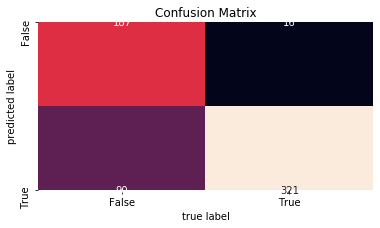

In [155]:
lucem_illud_2020.plotConfusionMatrix(logistic, train_data_df)

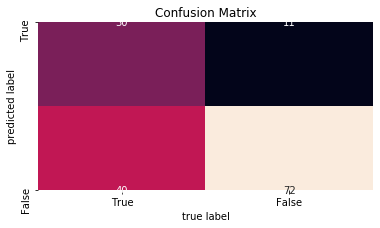

In [156]:
lucem_illud_2020.plotConfusionMatrix(logistic, test_data_df)

In [157]:
lucem_illud_2020.evaluateClassifier(logistic, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.172638,0.813806,0.921182,0.768461,0.675090
True,0.172638,0.813806,0.781022,0.769999,0.952522


In [151]:
lucem_illud_2020.evaluateClassifier(logistic, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.333333,0.648021,0.731707,0.575027,0.428571
True,0.333333,0.648021,0.642857,0.629555,0.867470


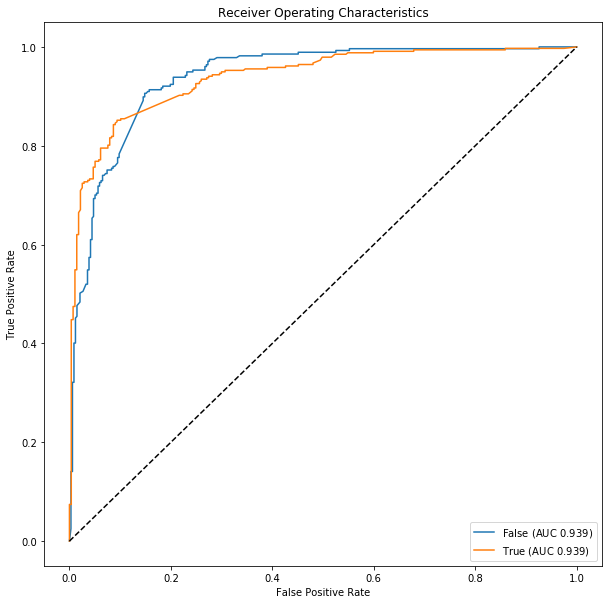

In [158]:
lucem_illud_2020.plotMultiROC(logistic, train_data_df)

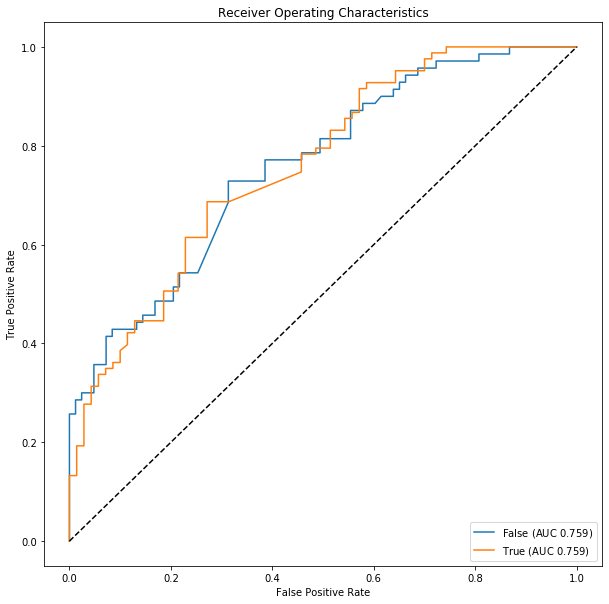

In [153]:
lucem_illud_2020.plotMultiROC(logistic, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


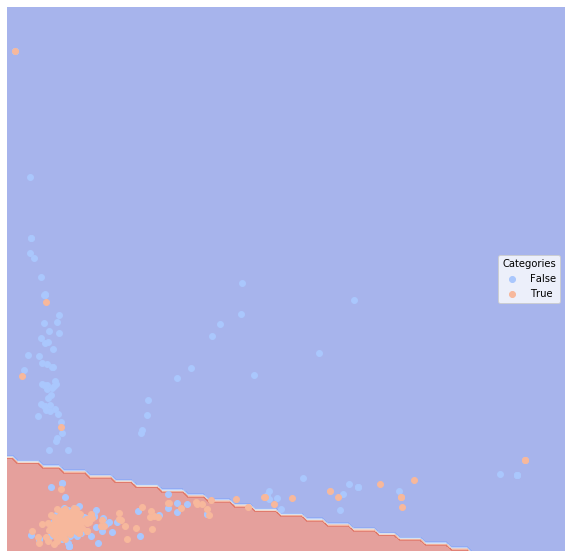

In [159]:
lucem_illud_2020.plotregions(logistic, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


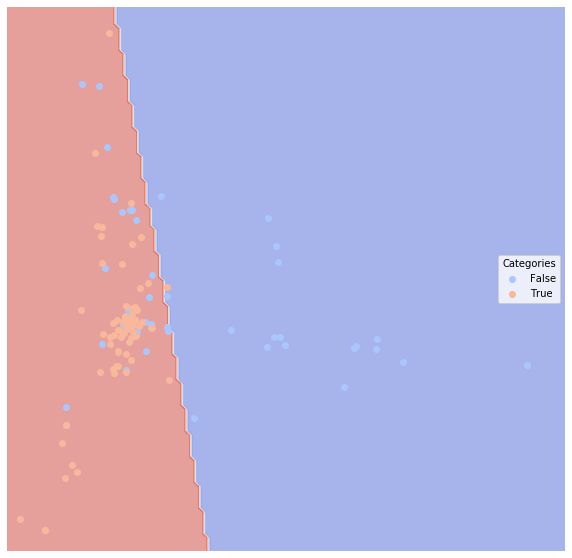

In [154]:
lucem_illud_2020.plotregions(logistic, test_data_df)

## <span style="color:red">*Exercise 2: Naive Bayes results*</span>



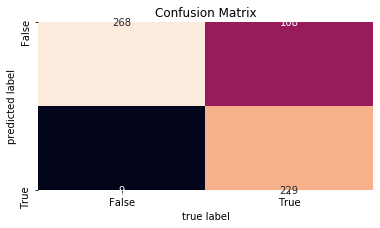

In [161]:
lucem_illud_2020.plotConfusionMatrix(naiveBayes, train_data_df)

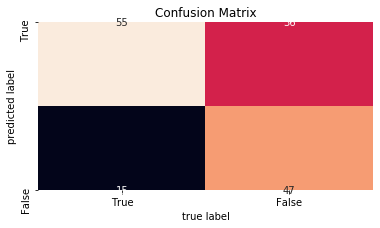

In [162]:
lucem_illud_2020.plotConfusionMatrix(naiveBayes, test_data_df)

In [163]:
lucem_illud_2020.evaluateClassifier(naiveBayes, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.190554,0.823517,0.712766,0.704265,0.967509
True,0.190554,0.823517,0.962185,0.829725,0.679525


In [164]:
lucem_illud_2020.evaluateClassifier(naiveBayes, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.333333,0.67599,0.604396,0.572921,0.785714
True,0.333333,0.67599,0.758065,0.664560,0.566265


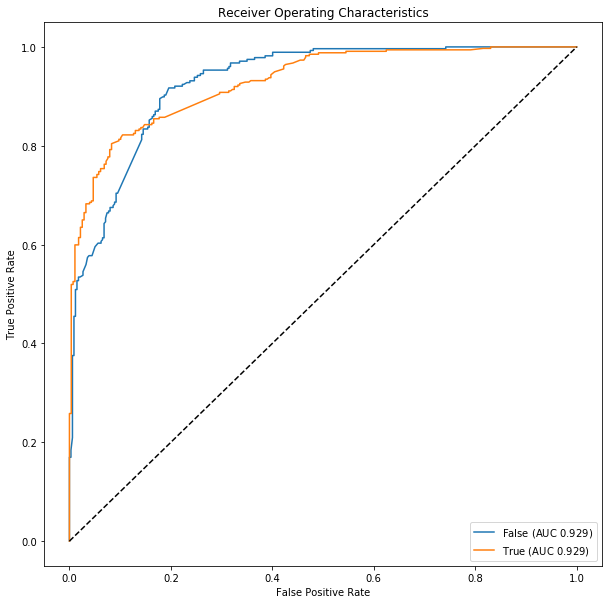

In [165]:
lucem_illud_2020.plotMultiROC(naiveBayes, train_data_df)

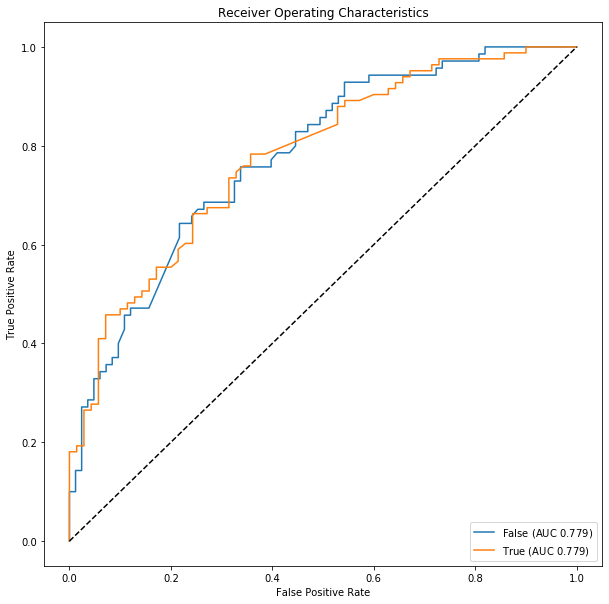

In [166]:
lucem_illud_2020.plotMultiROC(naiveBayes, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


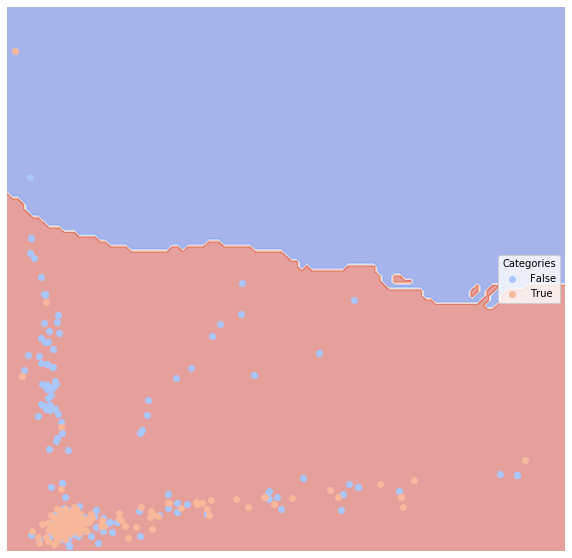

In [167]:
lucem_illud_2020.plotregions(naiveBayes, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


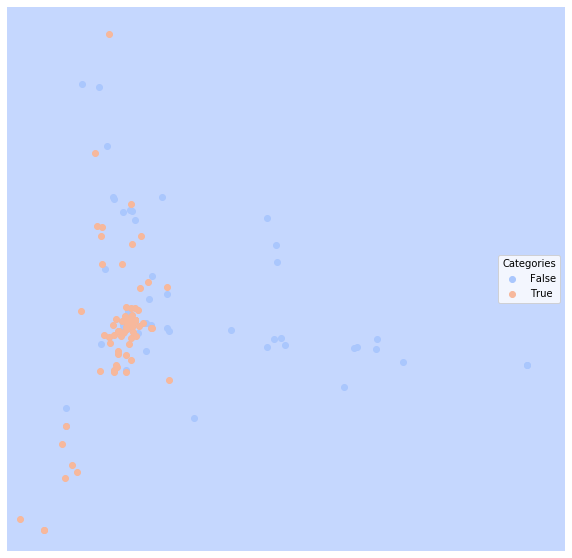

In [168]:
lucem_illud_2020.plotregions(naiveBayes, test_data_df)

## <span style="color:red">*Exercise 2: Discussion*</span>
<span style="color:red">Error rate for the training set is slightly lower with logistic regression but so is AUC, which is better when higher. The error rate for the test is same at 33.3% for both classifiers. Naive Bayes has a slightly higher AUC. Overall, two classifiers perform similarly. The difference is that precision for the false category, i.e. the line belongs to Morty, is higher with logistic regression, whereas recall is higher for the true category with logistic regression. Conversrly, with Naive Bayes, we observe higher recall for the false category and higher precision for the true category. I do not have a theory for why this is, but it seems like a fact from data. The portion of F-measure does not seem to working so it is not incldued in my results.


# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

In [ ]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [ ]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

To see what's going on visually with the classification: 

In [ ]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

Lets look at accuracy:

In [ ]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

What happens if we trim the tree?

In [ ]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [ ]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [ ]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

In [ ]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [ ]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

## <span style="color:red">*Exercise 3: results*</span>

In [178]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category'])
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10)
bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) 

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),
      

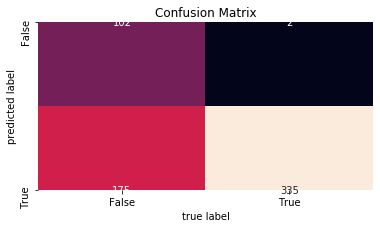

In [179]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, train_data_df)

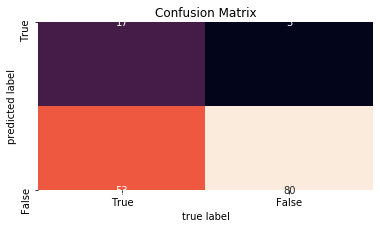

In [180]:
lucem_illud_2020.plotConfusionMatrix(clf_tree, test_data_df)

In [181]:
lucem_illud_2020.evaluateClassifier(clf_tree, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.288274,0.681148,0.980769,0.646166,0.368231
True,0.288274,0.681148,0.656863,0.656222,0.994065


In [182]:
lucem_illud_2020.evaluateClassifier(clf_tree, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.366013,0.603356,0.850000,0.552834,0.242857
True,0.366013,0.603356,0.601504,0.599371,0.963855


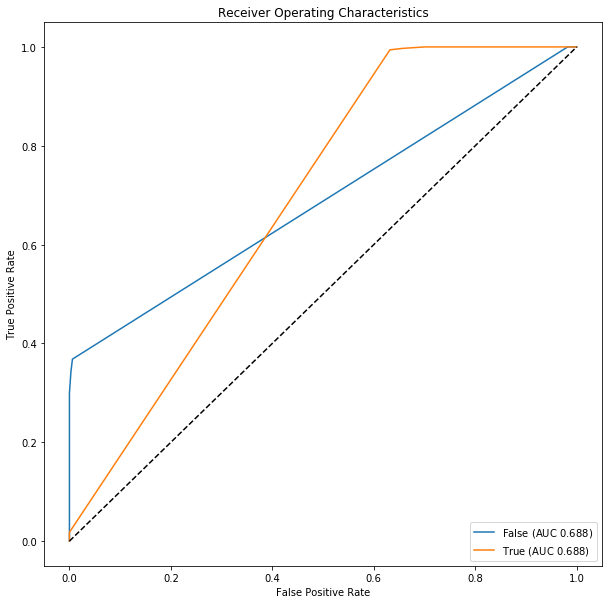

In [183]:
lucem_illud_2020.plotMultiROC(clf_tree, train_data_df)

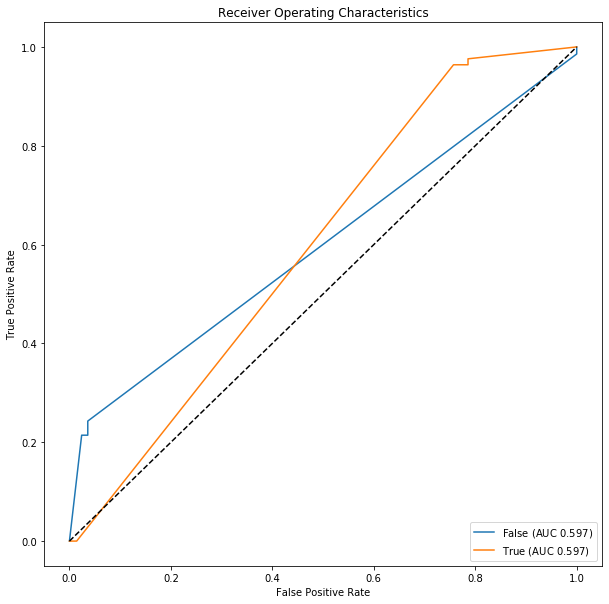

In [184]:
lucem_illud_2020.plotMultiROC(clf_tree, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


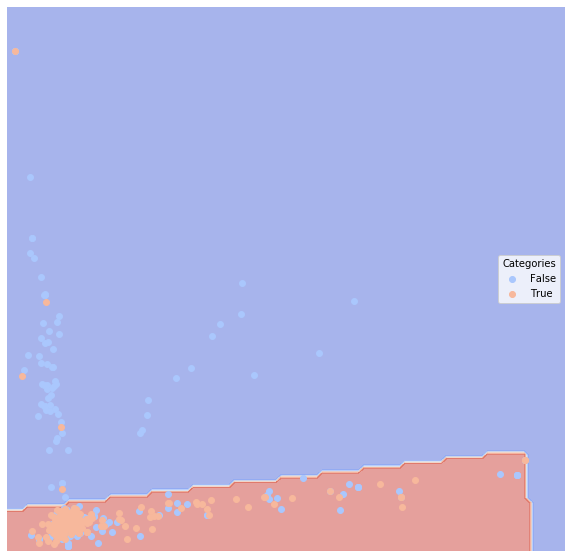

In [185]:
lucem_illud_2020.plotregions(clf_tree, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


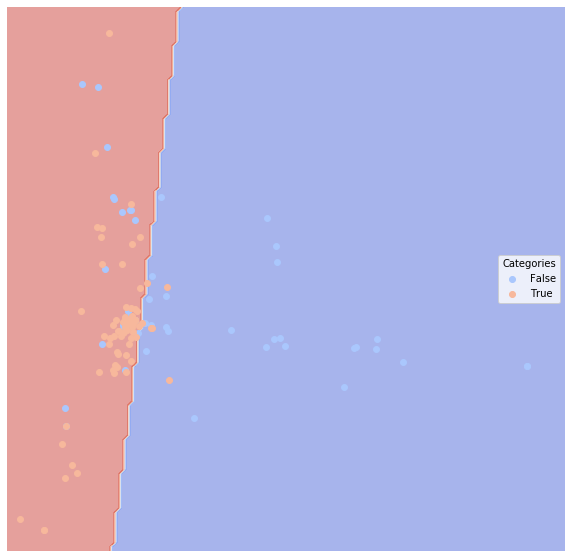

In [186]:
lucem_illud_2020.plotregions(clf_tree, test_data_df)

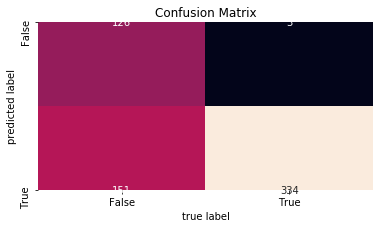

In [187]:
lucem_illud_2020.plotConfusionMatrix(bag, train_data_df)

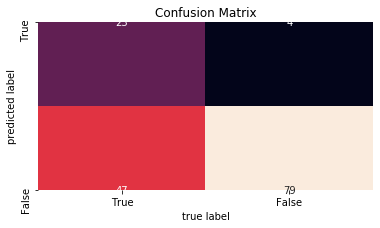

In [188]:
lucem_illud_2020.plotConfusionMatrix(bag, test_data_df)

In [189]:
lucem_illud_2020.evaluateClassifier(bag, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.250814,0.722986,0.976744,0.690224,0.454874
True,0.250814,0.722986,0.688660,0.687415,0.991098


In [190]:
lucem_illud_2020.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.333333,0.640189,0.851852,0.587084,0.328571
True,0.333333,0.640189,0.626984,0.622912,0.951807


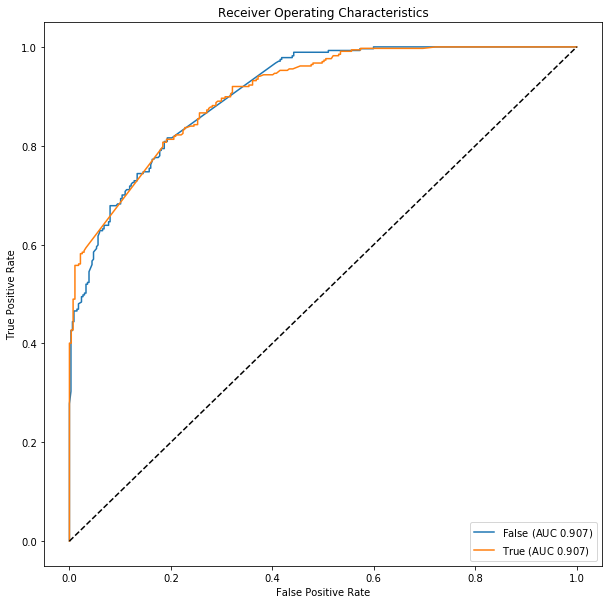

In [191]:
lucem_illud_2020.plotMultiROC(bag, train_data_df)

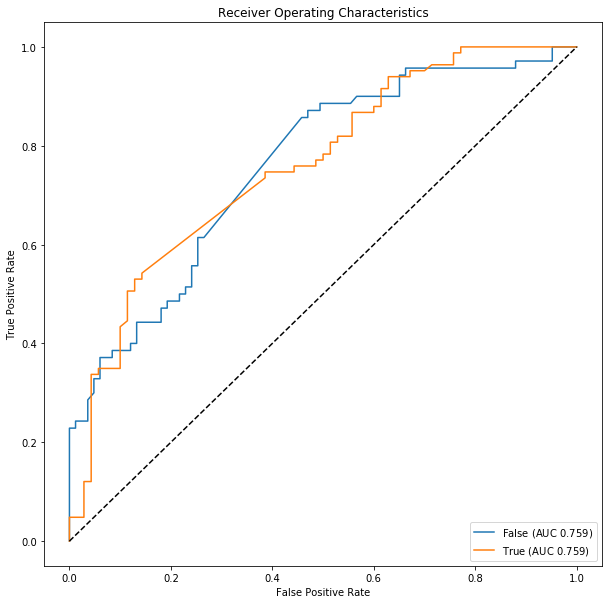

In [192]:
lucem_illud_2020.plotMultiROC(bag, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


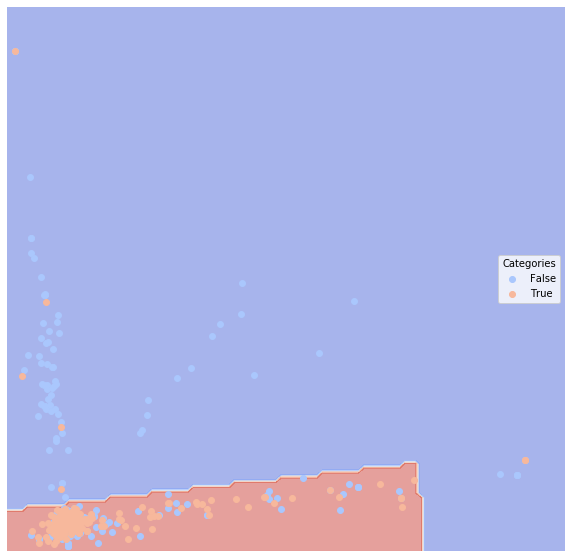

In [193]:
lucem_illud_2020.plotregions(bag, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


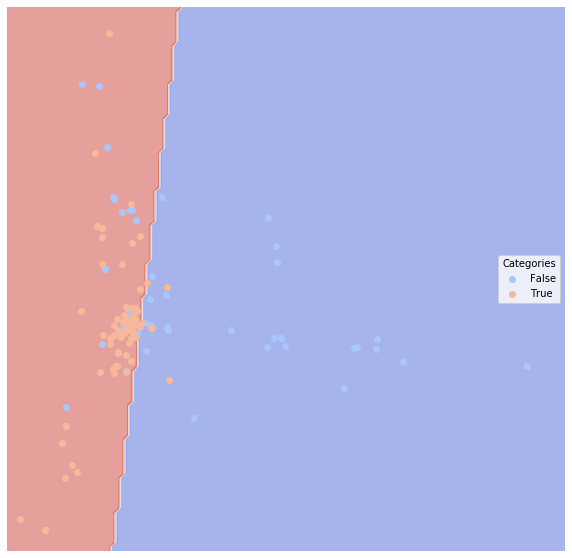

In [196]:
lucem_illud_2020.plotregions(bag, test_data_df)

## <span style="color:red">*Exercise 3: discussion*</span>
<span style="color:red">Decision tree performs strictly worse than logistic regression, Naive Bayes, and random forest. Although it yields high precision for the false category and high recall for the true category, its error rates and high and AUCs are low. Similar to what we have observed relatively consistently elsewhere, the performance of random forest strictly dominates that of decision tree due to the bagging technique. When compared to the two classifiers in exercise 2, its error rates are the same at 33.3% for both categories, but its AUC is slightly worse than both of them, therefore Naive Bayes still remains as the best classifier in all four classifiers we have tried so far.

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [ ]:
newsgroupsDF[:5]

Make a testing and training set:

In [ ]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [ ]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [ ]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [ ]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

And lets look at the testing data

In [ ]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Let's produce another confusion matrix:

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [ ]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

## <span style="color:red">*Exercise 4: results*</span>


In [197]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [199]:
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

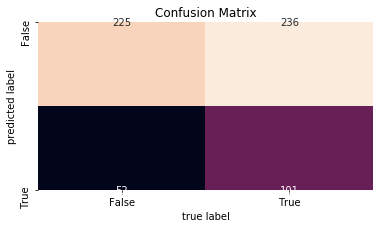

In [200]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, train_data_df)

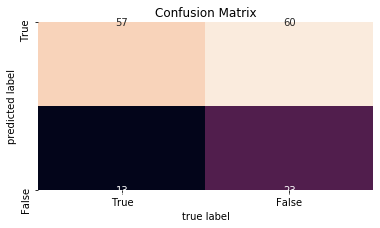

In [201]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_data_df)

In [202]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.469055,0.555989,0.488069,0.481137,0.812274
True,0.469055,0.555989,0.660131,0.582208,0.299703


In [203]:
lucem_illud_2020.evaluateClassifier(clf_knearest, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.477124,0.545697,0.487179,0.481671,0.814286
True,0.477124,0.545697,0.638889,0.569198,0.277108


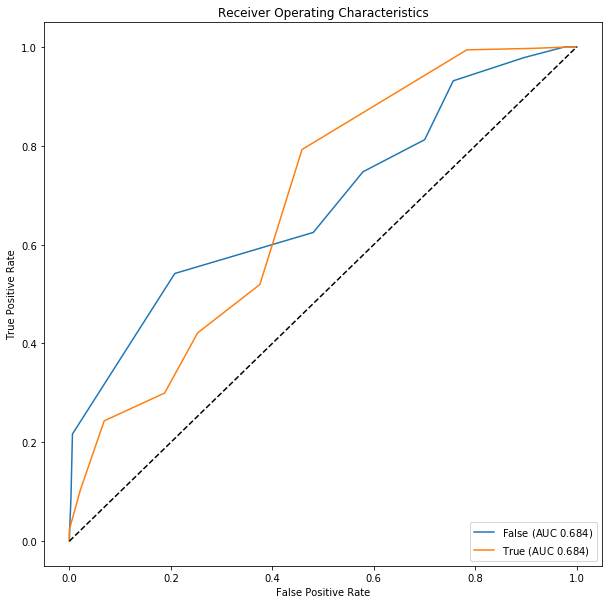

In [204]:
lucem_illud_2020.plotMultiROC(clf_knearest, train_data_df)

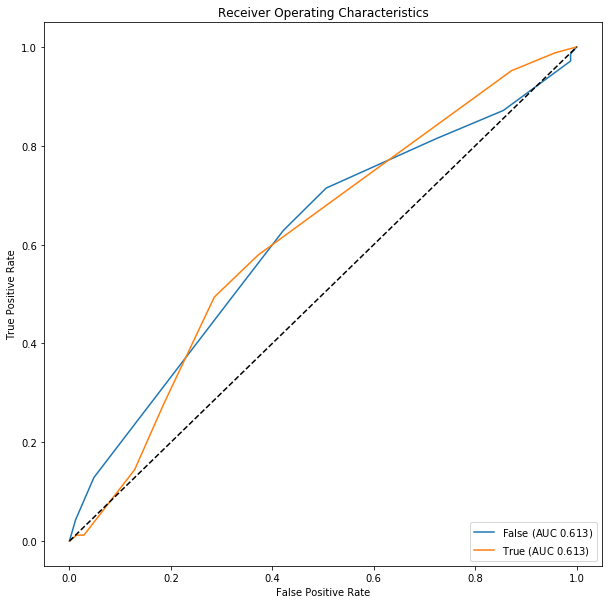

In [205]:
lucem_illud_2020.plotMultiROC(clf_knearest, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


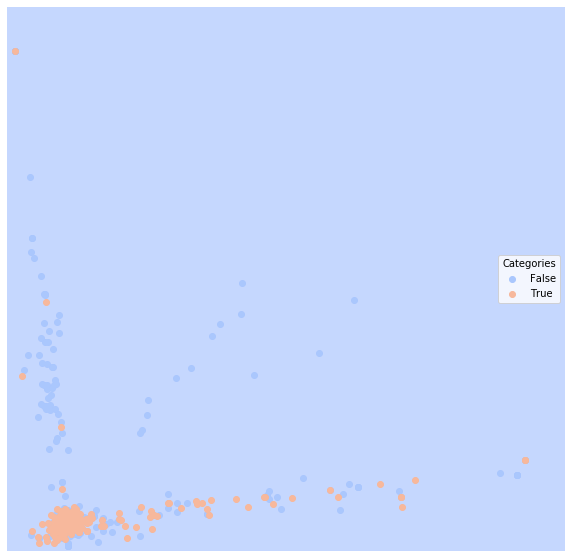

In [206]:
lucem_illud_2020.plotregions(clf_knearest, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


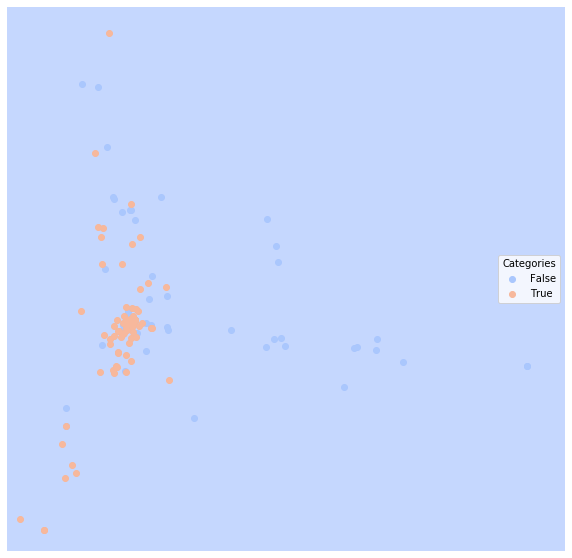

In [207]:
lucem_illud_2020.plotregions(clf_knearest, test_data_df)

## <span style="color:red">*Exercise 4: discussion*</span>
<span style="color:red">It turned out KNN is a terrible classifier for this task. Its performance is clearly the worst so far, high error rates, low AUCs, low precision, low recall, wow. I did not attempt the homework for the week with k-means clustering, but upon some quick research, the biggest difference, as I anticipated, is that KNN is supervised classification whereas k-means is unsupervised clustering, in other words, the variable "category" probably means nothing in the task of k-means clustering.


# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [ ]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [ ]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [ ]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [ ]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

...and consider the results:

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

In [ ]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [ ]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

In [ ]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

In [ ]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

In [ ]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

## <span style="color:red">*Exercise 5: results*</span>

In [211]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

/Users/ian/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

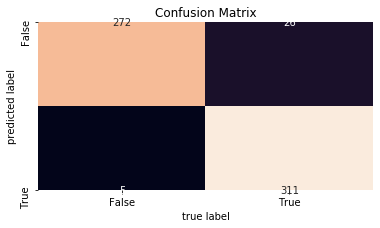

In [212]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, train_data_df)

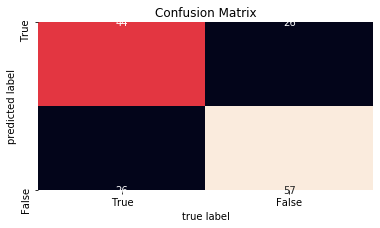

In [213]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_data_df)

In [214]:
lucem_illud_2020.evaluateClassifier(clf_nn, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.050489,0.952399,0.912752,0.904419,0.981949
True,0.050489,0.952399,0.984177,0.950592,0.922849


In [215]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.339869,0.657659,0.628571,0.565037,0.628571
True,0.339869,0.657659,0.686747,0.641556,0.686747


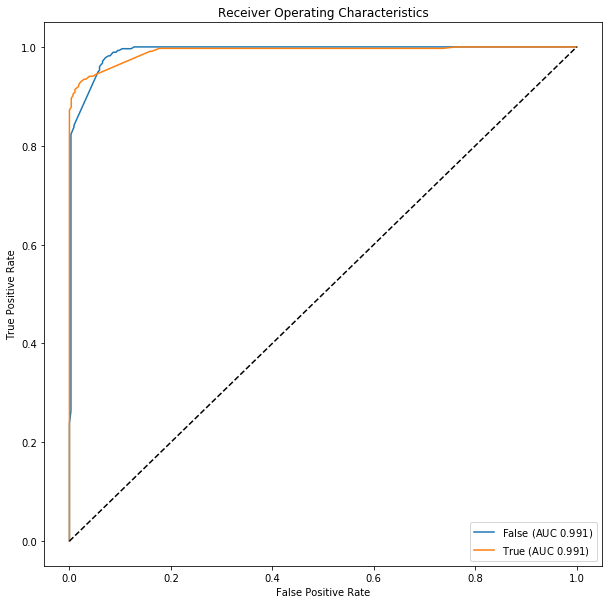

In [216]:
lucem_illud_2020.plotMultiROC(clf_nn, train_data_df)

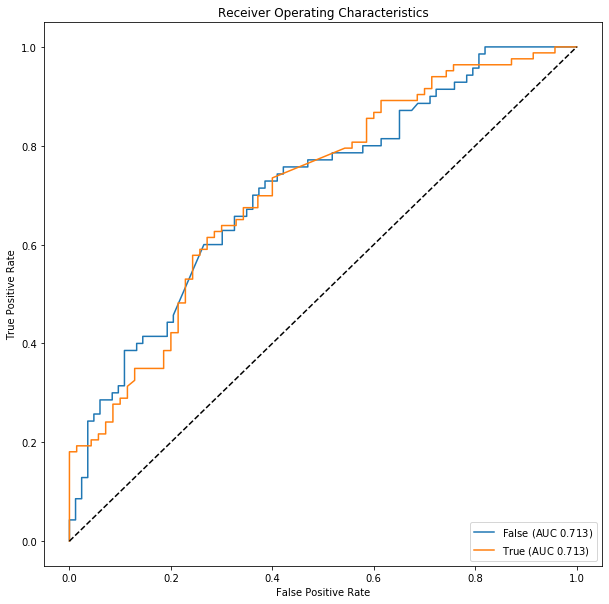

In [217]:
lucem_illud_2020.plotMultiROC(clf_nn, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


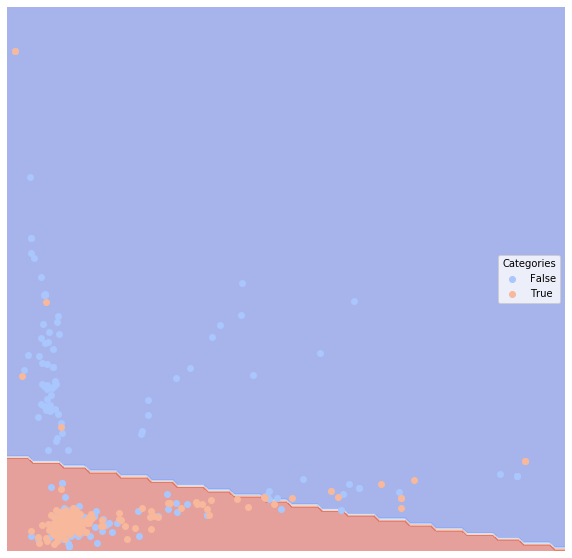

In [218]:
lucem_illud_2020.plotregions(clf_nn, train_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


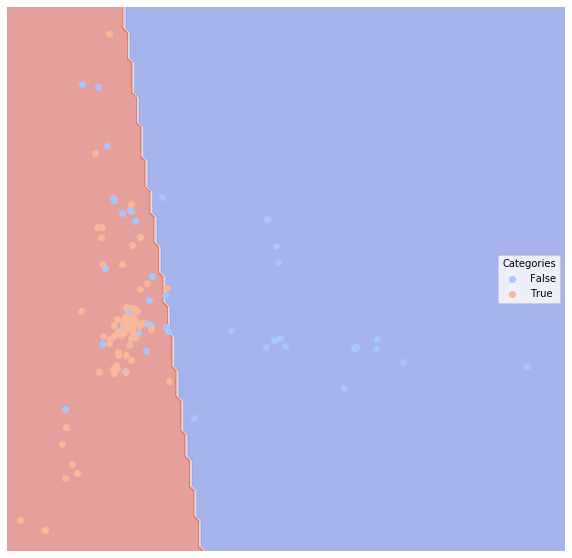

In [219]:
lucem_illud_2020.plotregions(clf_nn, test_data_df)

## <span style="color:red">*Exercise 5: discussion*</span>
<span style="color:red">For the training set, the accuracy with neural net is substantially higher than any classifier we have worked with thus far, the error rates are 5% as opposed to in the 10-20% range. AUC is very higher at 95%. Furthermore, precision and recall are both higher at the 90-100% range. This is only true with neural net, among all classifiers. On the other hand, the performance with the test set is average at best. The error rates are around 34%. Other metrics such AUC, precision, and recall are all average. I do not have a strong prior for why this is, either, but I think this resembles what one might expect in a case of overfitting.